[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Nepal-College-of-Information-Technology/AI-Data-Science-Worksop-2024/blob/main/Practice%20Yourself/Assignment_7.1_K-Means_Clustering.ipynb)

# Assignment 7.1: K-Means Clustering

## Instructions:

Complete the following tasks related to K-Means Clustering. You will use a dataset to group data points into clusters and visualize the results.

### Tasks:

1. **Task 1**: Load the **Iris dataset** from `sklearn.datasets`.
   - Hint: Use `datasets.load_iris()` to load the dataset.
   - Output: Display the first 5 rows of the dataset.

In [ ]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

iris_df['species'] = iris.target

pd.set_option('display.width', 1000)

print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  species
0                5.1               3.5                1.4               0.2        0
1                4.9               3.0                1.4               0.2        0
2                4.7               3.2                1.3               0.2        0
3                4.6               3.1                1.5               0.2        0
4                5.0               3.6                1.4               0.2        0


2. **Task 2**: Perform **K-Means Clustering** on the Iris dataset using 3 clusters.
   - Hint: Use `KMeans` from `sklearn.cluster`.
   - Output: Show the cluster labels for each data point.

In [ ]:
from sklearn.cluster import KMeans

iris = datasets.load_iris()
iris_data = iris.data

kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(iris_data)

cluster_labels = kmeans.labels_

iris_df['Cluster_Label'] = cluster_labels
print(iris_df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  species  Cluster_Label
0                5.1               3.5                1.4               0.2        0              1
1                4.9               3.0                1.4               0.2        0              1
2                4.7               3.2                1.3               0.2        0              1
3                4.6               3.1                1.5               0.2        0              1
4                5.0               3.6                1.4               0.2        0              1


3. **Task 3**: Plot the clusters on a 2D graph using the first two features (sepal length and sepal width).
   - Hint: Use `matplotlib` for visualization.

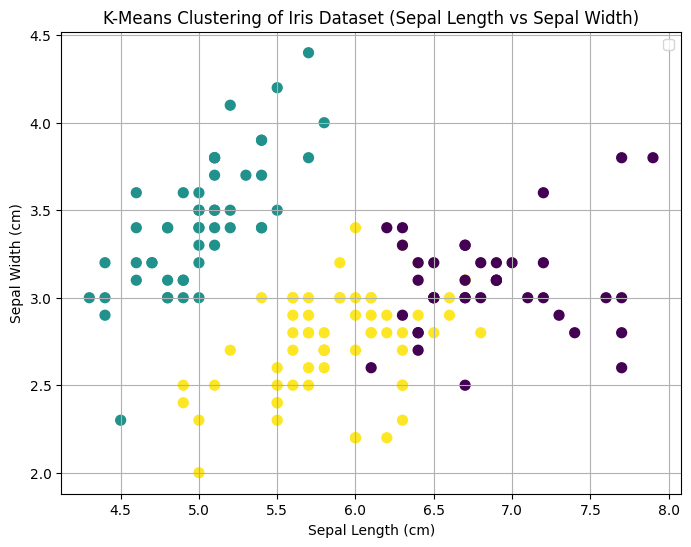

In [ ]:
import matplotlib.pyplot as plt

sepal_length = iris_df['sepal length (cm)']
sepal_width = iris_df['sepal width (cm)']

plt.figure(figsize=(8, 6))

plt.scatter(sepal_length, sepal_width, c=iris_df['Cluster_Label'], cmap='viridis', s=50)

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('K-Means Clustering of Iris Dataset (Sepal Length vs Sepal Width)')
plt.legend()
plt.grid(True)
plt.show()


4. **Task 4**: Evaluate the performance of your K-Means model using the  **Elbow Method** and **Silhouette Score**.
   - Hint: Follow the class note for Elbow Method and Use `silhouette_score` from `sklearn.metrics`.
   - Output: Plot the graph and Print the silhouette score.

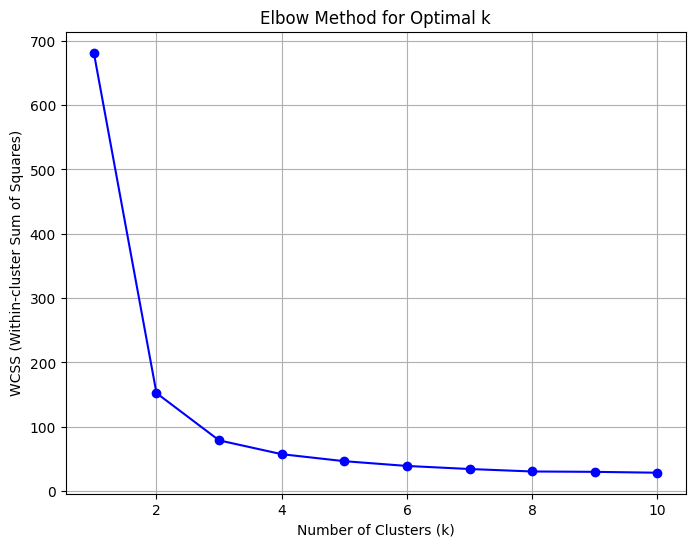

Silhouette Score for k=3: 0.55


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(iris.data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-cluster Sum of Squares)')
plt.grid(True)
plt.show()


kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(iris.data)
cluster_labels = kmeans.labels_

sil_score = silhouette_score(iris.data, cluster_labels)

print(f'Silhouette Score for k=3: {sil_score:.2f}')


5. **Task 5**: Repeat the clustering task but change the number of clusters to 2 and 4.
   - Output: Display and compare the silhouette scores for each number of clusters.

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

kmeans_2 = KMeans(n_clusters=2, random_state=42)
kmeans_2.fit(iris.data)
cluster_labels_2 = kmeans_2.labels_

kmeans_4 = KMeans(n_clusters=4, random_state=42)
kmeans_4.fit(iris.data)
cluster_labels_4 = kmeans_4.labels_

sil_score_2 = silhouette_score(iris.data, cluster_labels_2)
sil_score_4 = silhouette_score(iris.data, cluster_labels_4)

print(f'Silhouette Score for k=2: {sil_score_2:.2f}')
print(f'Silhouette Score for k=4: {sil_score_4:.2f}')


Silhouette Score for k=2: 0.68
Silhouette Score for k=4: 0.50


#### What is the best value suggest
-> Since, k=2 has the highest silhouette score, the data points in it are better clustered compared to others. So, it also has the best value.

---